In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(202, 400, 3)

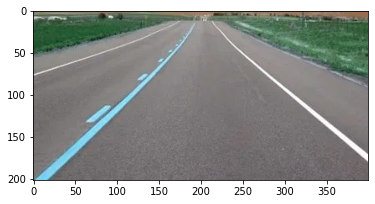

In [2]:
img = cv2.imread("test_image4.webp")
plt.imshow(img)
img.shape

(202, 400)

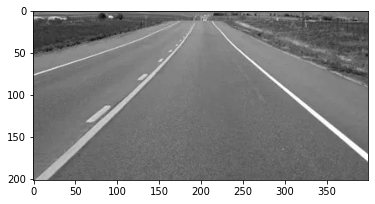

In [3]:
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray,cmap="gray")
img_gray.shape

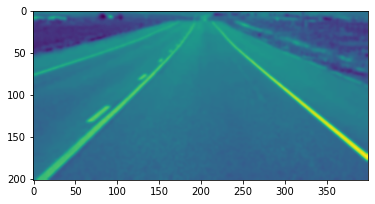

In [4]:
img_blur = cv2.GaussianBlur(img_gray,(7,7),0)
plt.imshow(img_blur)

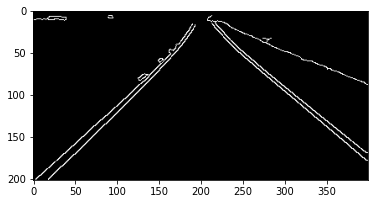

In [5]:
threshold_low = 10
threshold_high = 247

img_canny = cv2.Canny(img_blur,threshold_low,threshold_high)
plt.imshow(img_canny,cmap="gray")

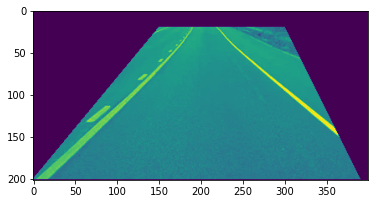

In [6]:
vertices = np.array([[(0,200),(150,20),(300,20),(390,200)]],dtype=np.int32)
mask = np.zeros_like(img_gray)
cv2.fillPoly(mask, vertices, 255)
masked_img = cv2.bitwise_and(img_gray, mask)
plt.figure()
plt.imshow(masked_img)

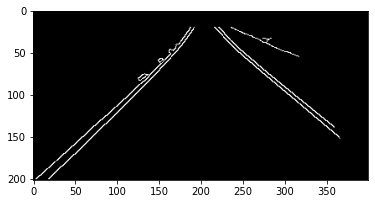

In [7]:
masked_image = cv2.bitwise_and(img_canny, mask)
plt.figure()
plt.imshow(masked_image,cmap="gray")

In [8]:
rho = 2
theta = np.pi/180
threshold = 40
min_line_len = 100
max_line_len = 50
lines = cv2.HoughLinesP(masked_image, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_len)

line_image = np.zeros((masked_image.shape[0], masked_image.shape[1], 3), dtype = np.uint8)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1), (x2,y2), [255,0,0], 10)

lines

array([[[ 50, 171, 164,  57]],

       [[227,  32, 359, 139]],

       [[ 38, 170, 181,  37]],

       [[240,  45, 365, 150]],

       [[ 39, 169, 191,  22]],

       [[223,  27, 359, 138]],

       [[252,  56, 366, 152]]], dtype=int32)

In [9]:
alpa = 1
bita = 1
gama = 0

Image_with_lines = cv2.addWeighted(img , alpa,line_image, bita, gama)

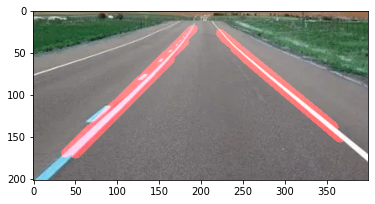

In [10]:
plt.figure()
plt.imshow(Image_with_lines)